In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from xgboost import XGBRegressor
from sklearn import metrics
import tensorflow as tf
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Big_Data_Analytics_Lab/Big_data_project/sephora_website_dataset.csv')
data

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [ ]:
data.shape

(9168, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [ ]:
data['ingredients'].unique()

array(['Arancia di Capri Eau de Toilette: Alcohol Denat.- Water- Fragrance- Limonene- Linalool- Ethylhexyl Methoxycinnamate- Citral- Butyl Methoxydibenzoylmethane- Ethylhexyl Salicylate- BHT- Geraniol- Benzyl Alcohol- Citronellol- Tocopherol.Bergamotto di Calabria Eau de Toilette:Alcohol Denat.- Fragrance- Water- Limonene- Ethylhexyl Methoxycinnamate- Linalool- Citral- Butyl Methoxydibenzoylmethane- Ethylhexyl Salicylate- Alpha-Isomethyl Ionone- Bht- Citronellol- Geraniol. Fico di Amalfi Eau de Toilette: Alcohol Denat.- Fragrance- Water- Limonene- Ethylhexyl Methoxycinnamate- Linalool- Alpha-Isomethyl Ionone- Hexyl Cinnamal- Butyl Methoxydibenzoylmethane- Ethylhexylsalicylate- Bht- Citronellol- Hydroxycitronellal- Coumarin- Citral- Geraniol- Amyl Cinnamal- Benzyl Salicylate- Butylphenyl Methylpropional- Benzyl Alcohol- Eugenol- Benzyl Benzoate- Disodium EDTA.Mirto di Panarea Eau de Toilette:Alcohol Denat.- Fragrance- Water- Limonene- Linalool- Butylphenyl Methylpropional- Hexyl Cinnama

In [ ]:
data['category'].unique()

array(['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist',
       'Body Lotions & Body Oils', 'Body Sprays & Deodorant',
       'Perfume Gift Sets', 'no category', 'Rollerballs & Travel Size',
       'Lip Balm & Treatment', 'Lotions & Oils', 'Eye Palettes',
       'Highlighter', 'Cheek Palettes', 'Lipstick', 'Face Serums',
       'Moisturizers', 'Value & Gift Sets', 'Eye Creams & Treatments',
       'Face Sunscreen', 'Lip Balms & Treatments', 'Mini Size',
       'Face Masks', 'Face Wash & Cleansers', 'Decollete & Neck Creams',
       'Face Oils', 'Hand Cream & Foot Cream', 'Face Primer',
       'Color Correct', 'Mists & Essences', 'Tinted Moisturizer',
       'Concealer', 'Beauty Supplements', 'Facial Peels', 'Exfoliators',
       'Conditioner', 'Shampoo', 'Hair Styling Products',
       'Scalp & Hair Treatments', 'Hair Masks', 'Hair Spray', 'Hair Oil',
       'Hair Primers', 'Dry Shampoo', 'Hair', 'Hair Thinning & Hair Loss',
       'Hair Straighteners & Flat Irons', 'Hair Dry

In [ ]:
data['category'].nunique()

143

In [ ]:
data.isnull().sum()

,0
id,0
brand,0
category,0
name,0
size,0
rating,0
number_of_reviews,0
love,0
price,0
value_price,0


In [ ]:
df=data[['brand','category','name','rating','number_of_reviews','ingredients','price','online_only']]
df

,brand,category,name,rating,number_of_reviews,ingredients,price,online_only
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,4.0,4,Arancia di Capri Eau de Toilette: Alcohol Dena...,66.0,1
1,Acqua Di Parma,Cologne,Colonia,4.5,76,unknown,66.0,1
2,Acqua Di Parma,Perfume,Arancia di Capri,4.5,26,Alcohol Denat.- Water- Fragrance- Limonene- Li...,180.0,1
3,Acqua Di Parma,Perfume,Mirto di Panarea,4.5,23,unknown,120.0,1
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,3.5,2,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,72.0,1
...,...,...,...,...,...,...,...,...
9163,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,2.0,15,-Rose Quartz Extract: Hydrates dry skin. Aqua...,6.0,0
9164,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,0.0,0,Colorful Gloss Balm Wanderlust: Hydrogenated P...,15.0,0
9165,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.0,0,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,16.0,0
9166,SEPHORA COLLECTION,no category,Gift Card,5.0,46,unknown,50.0,0


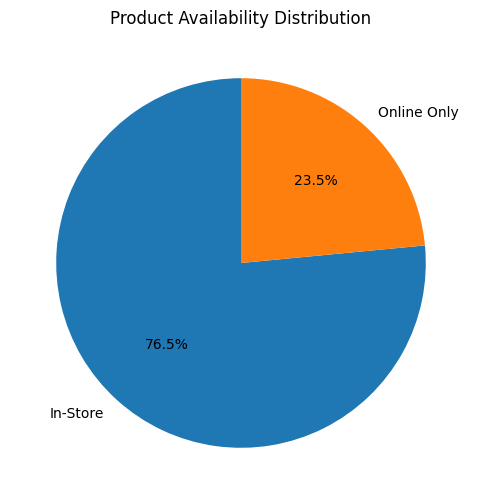

In [ ]:
# @title Product Availability Distribution

import matplotlib.pyplot as plt

online_counts = df['online_only'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(online_counts, labels=['In-Store', 'Online Only'], autopct='%1.1f%%', startangle=90)
_ = plt.title("Product Availability Distribution")

In [ ]:
x=df['category'].value_counts()
x

,count
category,
Perfume,665
Moisturizers,451
Face Serums,384
Value & Gift Sets,378
Face Wash & Cleansers,247
...,...
Wellness,1
High Tech Tools,1
Hair Styling & Treatments,1


In [ ]:
plt.figure(figsize=(100,100))
a=df['category'].sort_values()
plt.bar(x=df['category'].value_counts().index,height=df['category'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df['brand'].unique())
df['brand'].nunique()

['Acqua Di Parma' 'AERIN' 'Aether Beauty' 'Algenist' 'Alpha-H'
 'alpyn beauty' 'ALTERNA Haircare' 'amika' 'AMOREPACIFIC'
 'Anastasia Beverly Hills' 'Anthony' 'Antonym' 'Aquis' 'Armani Beauty'
 'The Art of Shaving' 'Artis' 'Artist Couture' 'Atelier Cologne'
 'BALENCIAGA' 'bareMinerals' 'Beachwaver' 'The Beauty Chef' 'BeautyBio'
 'beautyblender' 'BECCA' 'belif' 'Benefit Cosmetics' 'BERDOUES'
 'Bésame Cosmetics' 'Better Not Younger' 'Bio Ionic' 'Biossance'
 'Bite Beauty' 'bkr' 'Black Up' 'Blinc' 'Bobbi Brown' 'boscia' 'Briogeo'
 'Bumble and bumble' 'BURBERRY' 'Buxom' 'BVLGARI' 'By Rosie Jane'
 'Calvin Klein' 'Capri Blue' 'Carolina Herrera' 'Caudalie' 'Cellu-cup'
 'CHANEL' 'Charlotte Tilbury' 'Chloé' 'Christian Louboutin'
 'Christophe Robin' 'Ciaté London' 'Cinema Secrets' 'Clarins'
 'Clarisonic Skincare' 'CLEAN RESERVE' 'CLINIQUE' 'Coal and Canary'
 'Cocofloss' 'Commodity' 'Comptoir Sud Pacifique' 'Conture' 'COOLA'
 'COVER FX' 'Crushed Tonic' 'dae' 'Deborah Lippmann' 'DEREK LAM 10 CROSBY'

324

In [ ]:
plt.figure(figsize=(100,100))
plt.bar(x=df['brand'].value_counts().index,height=df['brand'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
categories_to_extract = ['Perfumes', 'Moisturizers', 'Face Serums']
df_extracted = df[df['category'].isin(categories_to_extract)]
df_extracted.reset_index()

,index,brand,category,name,rating,number_of_reviews,ingredients,price,online_only
0,63,Algenist,Face Serums,GENIUS Liquid Collagen,4.0,656,-Patented Alguronic Acid: Naturally sourced a...,115.0,0
1,64,Algenist,Moisturizers,GENIUS Sleeping Collagen,4.5,1000,-Patented Alguronic Acid: Naturally sourced a...,98.0,0
2,66,Algenist,Moisturizers,GENIUS Ultimate Anti-Aging Cream,4.5,462,-Patented Alguronic Acid: Naturally sourced a...,112.0,0
3,71,Algenist,Face Serums,GENIUS Ultimate Anti-Aging Vitamin C+ Serum,4.0,221,-Alguronic Acid: Improves the appearance of fi...,118.0,0
4,74,Algenist,Moisturizers,Regenerative Anti-Aging Moisturizer,4.5,215,-Alguronic Acid: Increases cell regeneration ...,94.0,0
...,...,...,...,...,...,...,...,...,...
830,8941,Yves Saint Laurent,Moisturizers,Pure Shots Perfect Plumper Face Cream Refill,0.0,0,-98-Percent Pure Anti-Aging Ribose: Helps impr...,70.0,1
831,8942,Yves Saint Laurent,Face Serums,Pure Shots Lines Away Anti-Aging Serum Refill,5.0,1,-High and Low Molecular Weight Hyaluronic Acid...,70.0,1
832,8946,Yves Saint Laurent,Face Serums,Pure Shots Light Up Brightening Serum Refill,0.0,0,-Vitamin Cg: Helps to reduce the look of yello...,70.0,1
833,8947,Yves Saint Laurent,Face Serums,Pure Shots Y Shape Firming Serum Refill,0.0,0,-100-Percent Pure Firming Peptide: Helps visib...,70.0,1


In [ ]:
df_extracted['brand'].value_counts()

,count
brand,
CLINIQUE,43
The Ordinary,32
Kiehl's Since 1851,26
Shiseido,25
Origins,24
...,...
Skin Laundry,1
Skin Inc Supplement Bar,1
COVER FX,1


In [ ]:
df_extracted= df_extracted.drop(df_extracted[df_extracted['ingredients'] == 'unknown'].index)
df_extracted

,brand,category,name,rating,number_of_reviews,ingredients,price,online_only
63,Algenist,Face Serums,GENIUS Liquid Collagen,4.0,656,-Patented Alguronic Acid: Naturally sourced a...,115.0,0
64,Algenist,Moisturizers,GENIUS Sleeping Collagen,4.5,1000,-Patented Alguronic Acid: Naturally sourced a...,98.0,0
66,Algenist,Moisturizers,GENIUS Ultimate Anti-Aging Cream,4.5,462,-Patented Alguronic Acid: Naturally sourced a...,112.0,0
71,Algenist,Face Serums,GENIUS Ultimate Anti-Aging Vitamin C+ Serum,4.0,221,-Alguronic Acid: Improves the appearance of fi...,118.0,0
74,Algenist,Moisturizers,Regenerative Anti-Aging Moisturizer,4.5,215,-Alguronic Acid: Increases cell regeneration ...,94.0,0
...,...,...,...,...,...,...,...,...
8941,Yves Saint Laurent,Moisturizers,Pure Shots Perfect Plumper Face Cream Refill,0.0,0,-98-Percent Pure Anti-Aging Ribose: Helps impr...,70.0,1
8942,Yves Saint Laurent,Face Serums,Pure Shots Lines Away Anti-Aging Serum Refill,5.0,1,-High and Low Molecular Weight Hyaluronic Acid...,70.0,1
8946,Yves Saint Laurent,Face Serums,Pure Shots Light Up Brightening Serum Refill,0.0,0,-Vitamin Cg: Helps to reduce the look of yello...,70.0,1
8947,Yves Saint Laurent,Face Serums,Pure Shots Y Shape Firming Serum Refill,0.0,0,-100-Percent Pure Firming Peptide: Helps visib...,70.0,1


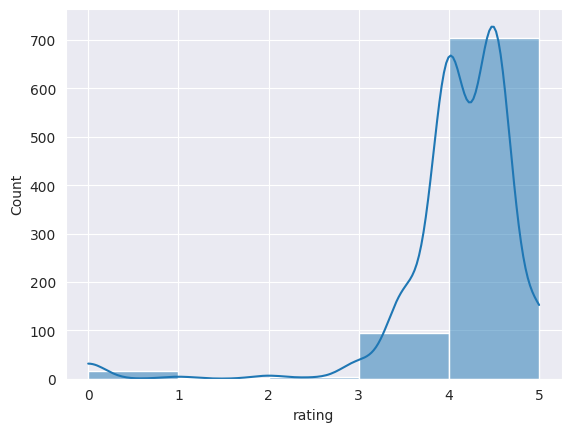

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df_extracted['rating'],kde=True,bins=5)
plt.show()

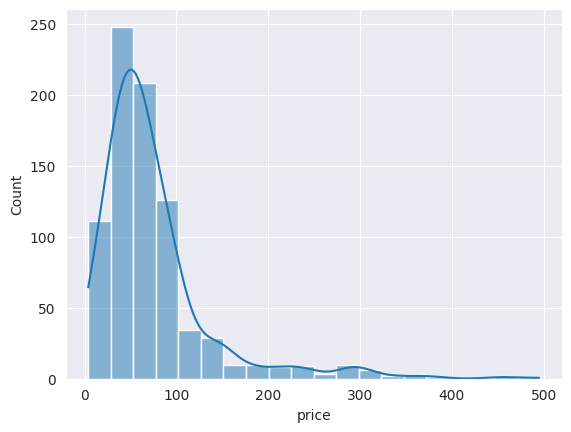

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df_extracted['price'],kde=True,bins=20)
plt.show()

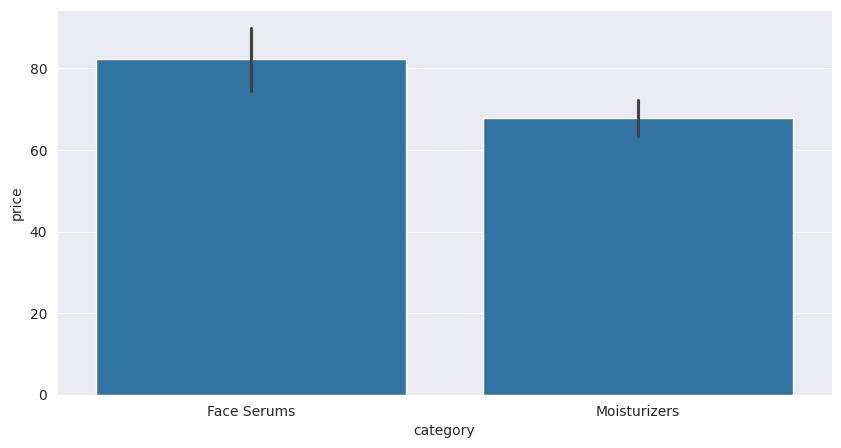

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(x='category',y='price',data=df_extracted)
plt.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text=re.sub(r'[\s\w]*.:','',text)
    text=re.sub(r'-.','',text)
    return text

# Apply preprocessing
df_extracted['clean_ingredients'] = df_extracted['ingredients'].apply(clean_text)

In [ ]:
df_extracted['clean_ingredients']

,clean_ingredients
63,naturally sourced and sustainably produced fr...
64,naturally sourced and sustainably produced fr...
66,naturally sourced and sustainably produced fr...
71,improves the appearance of firmness which resu...
74,increases cell regeneration and elastin synth...
...,...
8941,8ercent pure antihelps improve the appearance ...
8942,helps provide shortand longerm hydration. acts...
8946,helps to reduce the look of yellowness and dar...
8947,00helps visibly smoothnurtureand hydrate skin....


In [ ]:

# Step 1: Preprocess the ingredients
def preprocess_text(text):
    text = text.lower()   # Convert to lowercase
    text = re.sub(r'[^\w\s]',' ', text)   # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df_extracted['clean_ingredients'] = df_extracted['clean_ingredients'].apply(preprocess_text)

In [ ]:
df_extracted['clean_ingredients']

,clean_ingredients
63,naturally sourced sustainably produced algaeit...
64,naturally sourced sustainably produced algaeit...
66,naturally sourced sustainably produced algaeit...
71,improves appearance firmness results toned you...
74,increases cell regeneration elastin synthesis ...
...,...
8941,ercent pure antihelps improve appearance skin ...
8942,helps provide shortand longerm hydration acts ...
8946,helps reduce look yellowness dark spots bright...
8947,helps visibly smoothnurtureand hydrate skin co...


In [ ]:
# Step 2: Vectorize ingredients using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 2000 most frequent words
X = tfidf.fit_transform(df_extracted['clean_ingredients'])

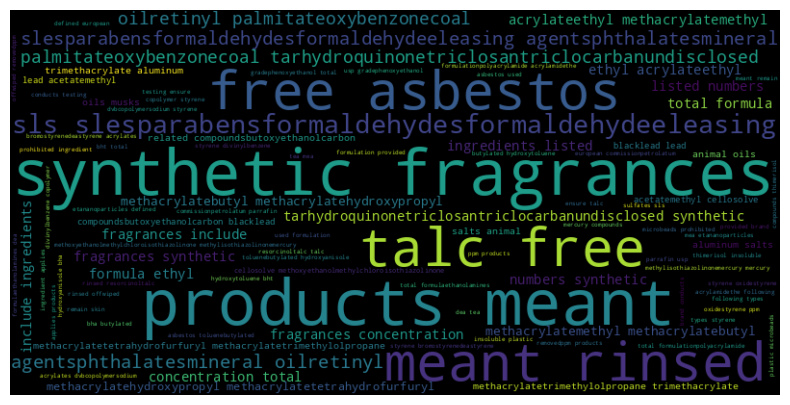

In [ ]:
# Step 3: Exploratory analysis - Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(df_extracted['clean_ingredients']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Word 2 Vector
from gensim.models import Word2Vec


In [ ]:
from gensim.models import Word2Vec

# Step 1: Prepare the data for Word2Vec
sentences = [text.split() for text in df_extracted['clean_ingredients']]

# Step 2: Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Access word vectors
vector = model.wv['water']  # Get the vector for a specific word
print(vector)

# Step 4: Analyze the word embeddings (Optional)
# You can explore the relationships between words by computing similarities, finding nearest neighbors, etc.
similar_words = model.wv.most_similar('water', topn=10)
print(similar_words)

[-0.29371402  0.55602777  0.54397357  0.3469914  -0.00457894 -0.96845394
  0.59249     1.720998   -0.7481436  -0.81992286 -0.05290063 -2.1299155
 -0.0450084   0.575419   -0.24008915 -0.62727064  0.25505716 -0.85291237
 -0.40684924 -2.154943    0.9715333   0.38925025  0.6713055  -0.56924087
  0.16715038  0.316361   -0.66191816 -1.104797   -0.5653575   0.2761185
  1.1244115   0.932908   -0.37227544 -0.83203816 -0.85988575  1.3523699
  0.625034   -1.1002948  -0.4449458  -2.146728   -0.36077055 -0.15943727
 -0.23132837  0.43666896  0.51341707 -1.0738292  -0.6382097  -0.0978302
  0.5751991   0.14039928  0.47114018 -1.3581992  -1.0945476  -0.60380965
 -1.1082655   0.26251352  0.2769968   0.11558478 -1.2259722   0.7292445
  0.12910265  0.25389087  0.27136555 -0.3206663  -1.2717829   0.28699026
  0.54704195  1.412798   -1.6084917   0.5523126  -0.74525535  0.45873874
  0.71405035 -0.44670814  0.49060854  0.35413256 -0.40280813  0.10634867
 -1.2018917   0.92186356 -0.42547148 -0.44576678 -0.1771

In [ ]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming df_extracted is your DataFrame with 'clean_ingredients' and 'category' columns.

# Step 1: Prepare the data for Word2Vec
sentences = [text.split() for text in df_extracted['clean_ingredients']]

# Step 2: Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Define function to convert a sentence to a vector
def sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.key_to_index]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)

# Step 4: Transform each sentence in 'clean_ingredients' into a vector
word2vec_data = np.array([sentence_vector(sentence, model) for sentence in df_extracted['clean_ingredients']])

# Step 5: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(word2vec_data, df_extracted['category'], test_size=0.3, random_state=42)

# Step 6: Initialize and train the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Step 7: Predict and evaluate the model
y_pred = rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6072874493927125
Classification Report:
               precision    recall  f1-score   support

 Face Serums       0.60      0.53      0.56       118
Moisturizers       0.61      0.68      0.64       129

    accuracy                           0.61       247
   macro avg       0.61      0.60      0.60       247
weighted avg       0.61      0.61      0.60       247



In [ ]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming df_extracted is your DataFrame with 'clean_ingredients' and 'category' columns.

# Step 1: Prepare sentences for Word2Vec training
sentences = [text.split() for text in df_extracted['clean_ingredients']]

# Step 2: Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Convert sentences to sequences of word indices based on the Word2Vec vocabulary
def sentence_to_indices(sentence, model):
    return [model.wv.key_to_index[word] for word in sentence.split() if word in model.wv.key_to_index]

# Apply to all sentences
sequences = [sentence_to_indices(sentence, word2vec_model) for sentence in df_extracted['clean_ingredients']]

# Step 4: Pad sequences to ensure equal length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Step 5: Prepare embedding matrix for the Embedding layer
vocab_size = len(word2vec_model.wv)
embedding_dim = word2vec_model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in word2vec_model.wv.key_to_index.items():
    embedding_matrix[idx] = word2vec_model.wv[word]
y=df_extracted['category']
y_encoded=LabelEncoder().fit_transform(y)

# Step 6: Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_encoded, test_size=0.3, random_state=42)

# Convert labels to categorical (if classification task)
num_classes = len(set(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Step 7: Define the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.5165 - loss: 0.7040 - val_accuracy: 0.5223 - val_loss: 0.6937
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5057 - loss: 0.7034 - val_accuracy: 0.5223 - val_loss: 0.7013
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4938 - loss: 0.7080 - val_accuracy: 0.5223 - val_loss: 0.6957
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5713 - loss: 0.6817 - val_accuracy: 0.5223 - val_loss: 0.6922
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5202 - loss: 0.6961 - val_accuracy: 0.5223 - val_loss: 0.6953
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5486 - loss: 0.6919 - val_accuracy: 0.5223 - val_loss: 0.6944
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5264 - loss: 0.6931 - val_accuracy: 0.5223 - val_loss: 0.6925
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5585 - loss: 0.6863 - val_accuracy: 0.5223 - val_l

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming df_extracted is your DataFrame with 'clean_ingredients' and 'category' columns.

# Step 1: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_extracted['clean_ingredients'])
sequences = tokenizer.texts_to_sequences(df_extracted['clean_ingredients'])

# Step 2: Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

y=df_extracted['category']
y_encoded=LabelEncoder().fit_transform(y)
# Step 3: Prepare labels (assuming 'category' is your target variable)
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_encoded, test_size=0.3, random_state=42)

# Convert labels to categorical if it's a multi-class classification problem
num_classes = len(set(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Step 4: Define the LSTM model
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_dim = 100  # You can adjust the embedding dimension

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5260 - loss: 0.6921 - val_accuracy: 0.5223 - val_loss: 0.6955
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5667 - loss: 0.6838 - val_accuracy: 0.5223 - val_loss: 0.6922
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5602 - loss: 0.6906 - val_accuracy: 0.5223 - val_loss: 0.6923
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5016 - loss: 0.6936 - val_accuracy: 0.5223 - val_loss: 0.6939
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5170 - loss: 0.6959 - val_accuracy: 0.5223 - val_loss: 0.6951
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5259 - loss: 0.6950 - val_accuracy: 0.5223 - val_loss: 0.6926
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5441 - loss: 0.6898 - val_accuracy: 0.5223 - val_loss: 0.6963
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5363 - loss: 0.6937 - val_accuracy: 0.5223 - val_l

In [ ]:
from tensorflow.keras.layers import Bidirectional, GRU

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, trainable=True),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    GRU(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile and train as before
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.5353 - loss: 0.6917 - val_accuracy: 0.5223 - val_loss: 0.6941
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5349 - loss: 0.6935 - val_accuracy: 0.5223 - val_loss: 0.6934
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5646 - loss: 0.6875 - val_accuracy: 0.5223 - val_loss: 0.6922
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5513 - loss: 0.6889 - val_accuracy: 0.5223 - val_loss: 0.6932
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5685 - loss: 0.6867 - val_accuracy: 0.5223 - val_loss: 0.6928
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5290 - loss: 0.6918 - val_accuracy: 0.5223 - val_loss: 0.6930
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5479 - loss: 0.6888 - val_accuracy: 0.5223 - val_loss: 0.6960
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5530 - loss: 0.6896 - val_accuracy: 0